# <span style="color:red">++++++++++++++++++++++Ayad++++++++++++++++++++++</span>

# <span style="color:blue">1- Data</span>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'D:\Projects\Machine Learning\Unsupervised Learning\data.csv')
data.head()

,0,1,2,3,4,5,6,7
0,-2.084839,-0.471673,-0.955542,-0.567288,-0.953226,-1.510386,0.921728,0.437954
1,0.003700,-0.999118,0.202003,1.612001,-0.375642,0.378518,0.113693,1.718011
2,-1.456240,0.483522,-0.508605,-0.316406,-1.695560,-1.943310,0.299486,0.147370
3,-1.595524,-0.219744,1.039403,0.381587,0.109094,-0.155068,0.156054,0.007314
4,0.995277,-1.517259,-0.101198,1.415742,-0.054356,0.611216,0.196938,0.641809


In [3]:
data.shape

(1309, 8)

In [38]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

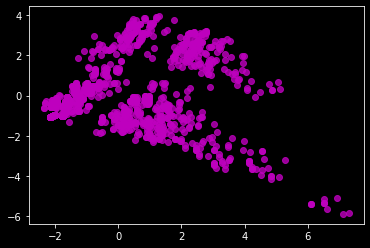

In [44]:
plt.scatter(data.iloc[:, 0].values, data.iloc[:, 1].values, c = 'm', alpha=0.8)
plt.show()

# <span style="color:blue">2- DBSCAN</span>

In [4]:
from sklearn.cluster import DBSCAN

In [5]:
db = DBSCAN(eps = 0.5, min_samples = 4)

In [46]:
labels = db.fit_predict(data.iloc[:, 0:2].values)

In [47]:
db.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [51]:
# set(labels)
set(db.labels_)

{-1, 0, 1, 2, 3, 4}

In [34]:
colors = ['white', 'green', 'red', 'cyan', 'blue', 'yellow']

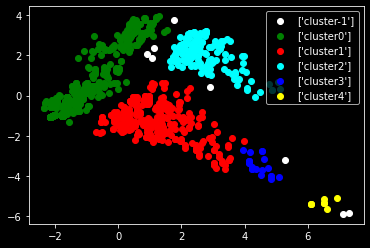

In [52]:
for i, c in enumerate(colors, -1):
    plt.scatter(data.iloc[labels==i, 0].values, data.iloc[labels==i, 1].values,
                c=c, label=[f"cluster{i}"])
    
plt.legend()
plt.show()

#### Note: Samples labeled '-1' are noise.

# <span style="color:blue">3- Concatenate the labels with the data</span>

In [54]:
df = pd.DataFrame(labels, columns = ['Labels'])
df

,Labels
0,0
1,1
2,0
3,0
4,1
...,...
1304,0
1305,0
1306,1
1307,0


In [55]:
pd.concat([data, df], axis=1)

,0,1,2,3,4,5,6,7,Labels
0,-2.084839,-0.471673,-0.955542,-0.567288,-0.953226,-1.510386,0.921728,0.437954,0
1,0.003700,-0.999118,0.202003,1.612001,-0.375642,0.378518,0.113693,1.718011,1
2,-1.456240,0.483522,-0.508605,-0.316406,-1.695560,-1.943310,0.299486,0.147370,0
3,-1.595524,-0.219744,1.039403,0.381587,0.109094,-0.155068,0.156054,0.007314,0
4,0.995277,-1.517259,-0.101198,1.415742,-0.054356,0.611216,0.196938,0.641809,1
...,...,...,...,...,...,...,...,...,...
1304,-0.862703,0.104828,1.984113,-2.026618,-1.723234,1.355618,0.019176,0.361044,0
1305,0.299519,2.404711,-0.473917,0.539437,0.144996,1.079460,-0.593131,0.062784,0
1306,1.983708,-2.251345,-0.891493,0.934429,0.553115,1.194912,0.344667,-1.039349,1
1307,0.369343,3.529447,-0.542355,-1.130391,0.468369,-0.998843,0.550265,0.041131,0


## <span style="color:chocolate">Heuristics for experimenting with DBSCAN's parameters</span>

<br>Many small clusters. More than anticipated for the dataset. <br>**Action**: increase min_samples and epsilon.

<br>Most points belong to one cluster<br>**Action**: decrease epsilon and increase min_samples.

<br>Most/all data points are labeled as noise<br>**Action**: increase epsilon and decrease min_sample.

<br> Except for extremely dense regions, most/all data points are <br>labeled as noise. (Or all points are labeled as noise). <br>**Action**: decrease min_samples and epsilon.

# <span style="color:red">++++++++++++++++++++++Ayad++++++++++++++++++++++</span>